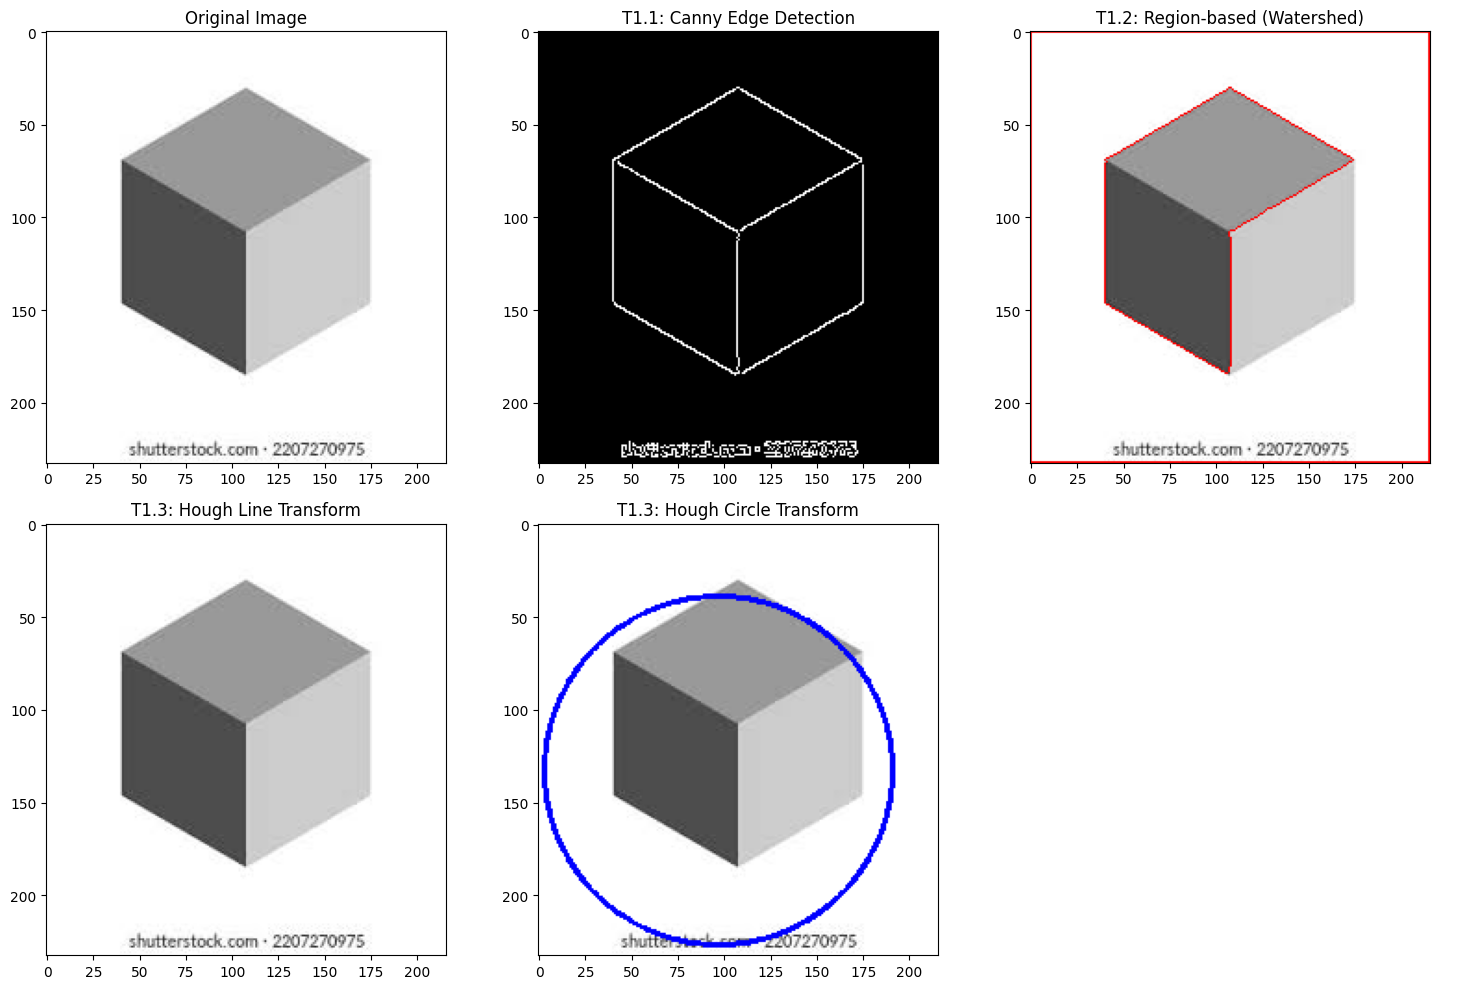

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/download.jpeg', cv2.IMREAD_COLOR)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray, 100, 200)

ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

sure_bg = cv2.dilate(opening, kernel, iterations=3)

dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

image_copy = image.copy()
cv2.watershed(image_copy, markers)
image_copy[markers == -1] = [0, 0, 255]

edges_hough = cv2.Canny(gray, 50, 150)
lines = cv2.HoughLinesP(edges_hough, 1, np.pi/180, threshold=100, minLineLength=50, maxLineGap=10)

line_img = image.copy()
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_img, (x1, y1), (x2, y2), (0, 255, 0), 2)

circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30, param1=50, param2=30, minRadius=5, maxRadius=100)

circle_img = image.copy()
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(circle_img, (i[0], i[1]), i[2], (255, 0, 0), 2)

fig, ax = plt.subplots(2, 3, figsize=(15, 10))

ax[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0, 0].set_title("Original Image")

ax[0, 1].imshow(edges, cmap='gray')
ax[0, 1].set_title("T1.1: Canny Edge Detection")

ax[0, 2].imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB))
ax[0, 2].set_title("T1.2: Region-based (Watershed)")

ax[1, 0].imshow(cv2.cvtColor(line_img, cv2.COLOR_BGR2RGB))
ax[1, 0].set_title("T1.3: Hough Line Transform")

ax[1, 1].imshow(cv2.cvtColor(circle_img, cv2.COLOR_BGR2RGB))
ax[1, 1].set_title("T1.3: Hough Circle Transform")

ax[1, 2].axis("off")

plt.tight_layout()
plt.show()


  Using cached ultralytics-8.3.95-py3-none-any.whl.metadata (35 kB)
  Using cached ultralytics_thop-2.0.14-py3-none-any.whl.metadata (9.4 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl.m

100%|██████████| 6.25M/6.25M [00:00<00:00, 17.1MB/s]



0: 448x640 1 person, 1 bicycle, 8 cars, 1 traffic light, 363.1ms
Speed: 17.7ms preprocess, 363.1ms inference, 33.4ms postprocess per image at shape (1, 3, 448, 640)


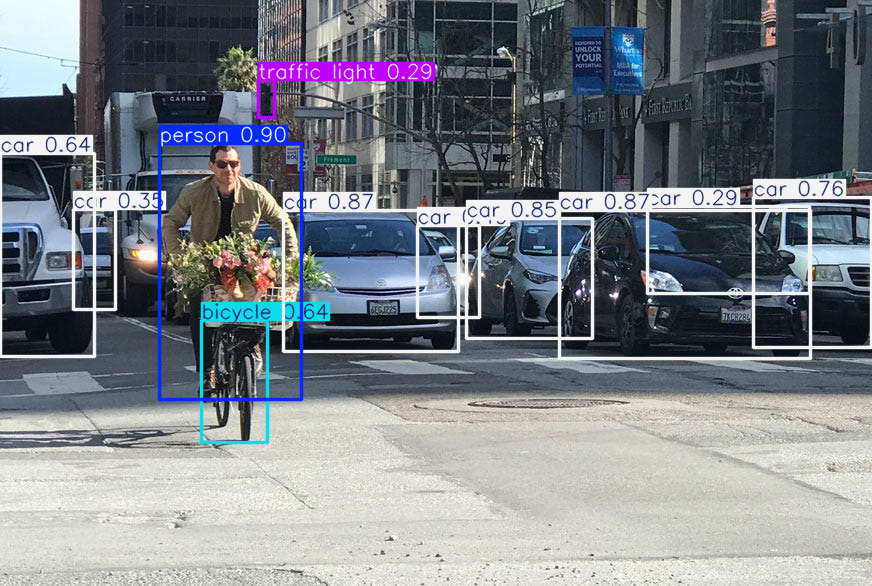

100%|██████████| 26.4M/26.4M [00:03<00:00, 8.66MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 135kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 2.54MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 10.1MB/s]


Epoch 1, Loss: 0.4047074317932129
Epoch 2, Loss: 0.35658127069473267
Epoch 3, Loss: 0.2962895333766937
Epoch 4, Loss: 0.2932858169078827
Epoch 5, Loss: 0.2683756351470947
Test Accuracy: 89.51%


In [2]:
!pip install ultralytics

import cv2
import torch
import matplotlib.pyplot as plt
from ultralytics import YOLO

model = YOLO("yolov8n.pt")
image_path = "sample.jpg"
image = cv2.imread(image_path)

results = model(image)

for result in results:
    result.show()
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.FashionMNIST(root="./data", train=True, download=True, transform=transform)
testset = torchvision.datasets.FashionMNIST(root="./data", train=False, download=True, transform=transform)

trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(32 * 14 * 14, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = x.view(-1, 32 * 14 * 14)
        x = self.fc1(x)
        return x

model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(5):
    for images, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item()}")

correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")
